In [1]:
import csv
import numpy as np
from collections import defaultdict
from matplotlib import pyplot
import pandas

In [2]:
BLANKS=["","RBNF1", "RBNF2", "RBNF", "0", "RBNF 1", "RBNF 2"]
#TOTAL= 5048
TOTAL=2734
#TOTAL=1351
#TOTAL=1201
#TOTAL=1168
#TOTAL=996
#TOTAL=194

In [3]:
def loadCsvData(fileName):
	matrix = []
	# open a file
	with open(fileName) as f:
		reader = csv.reader(f)

		# loop over each row in the file
		for row in reader:

			# cast each value to a float
			doubleRow = []
			for value in row:
				doubleRow.append(str(value).strip())

			# store the row into our matrix
			matrix.append(doubleRow)
	return matrix

In [4]:
def printData(matrix):
	for row in matrix:
		print (row)

In [5]:
data= loadCsvData("data/metadata.csv")

In [6]:
data=pandas.DataFrame(data[1:], columns=data[0])

In [7]:
#whole corpus processing
database=defaultdict(lambda: defaultdict(lambda:0))
for i in range(len(data)):
    #if not data["collection_id"][i]== "HM":
    #    continue
    #if data["sex"][i] =="Male":
    #    continue
    for atr in data.columns:
        if atr== "researcher_assumed_birth_decade":
            continue
        if atr== "researcher_assumed_race":
            continue
        value= data[atr][i]
        if value in BLANKS and atr=="\ufeffbirth_decade":
            value= data.loc[i, "researcher_assumed_birth_decade"]
        if value in BLANKS and atr=="identified_race":
            value= data.loc[i, "researcher_assumed_race"]
        database[i][atr]=value


In [8]:
dataformatted=defaultdict(lambda: defaultdict(lambda:0))
for i in database : 
    if database[i]["sex"]=="Male":
        continue
    for atr in database[i]:
        value= database[i][atr]
        if value not in BLANKS:
            dataformatted[atr][value]+=1
for cat in dataformatted:
    total=0
    for x in dataformatted[cat]:
        total+= dataformatted[cat][x]
    dataformatted[cat]["No Info"]= TOTAL-total

In [9]:
#HM processing
databaseHM=defaultdict(lambda: defaultdict(lambda:0))
for i in range(len(data)):
    if not data["collection_id"][i]== "HM":
        continue
    #if data["sex"][i] =="Male":
    #    continue
    for atr in data.columns:
        if atr== "researcher_assumed_birth_decade":
            continue
        if atr== "researcher_assumed_race":
            continue
        value= data[atr][i]
        if value in BLANKS and atr=="\ufeffbirth_decade":
            value= data.loc[i, "researcher_assumed_birth_decade"]
        if value in BLANKS and atr=="identified_race":
            value= data.loc[i, "researcher_assumed_race"]
        databaseHM[i][atr]=value

In [10]:
dataformattedHM=defaultdict(lambda: defaultdict(lambda:0))
for i in databaseHM: 
    if databaseHM[i]["sex"]=="Male":
        continue
    for atr in databaseHM[i]:
        value= databaseHM[i][atr]
        if value not in BLANKS:
            dataformattedHM[atr][value]+=1
for cat in dataformattedHM:
    total=0
    for x in dataformattedHM[cat]:
        total+= dataformattedHM[cat][x]
    dataformattedHM[cat]["No Info"]= TOTAL-total

In [11]:
#Hits processing
interviewtxt =loadCsvData("data/interview text fille to ids.csv")

In [12]:
interviewtxt=pandas.DataFrame(interviewtxt[1:], columns=interviewtxt[0])

In [13]:
text_to_ids={}
for i in range(len(interviewtxt)):
    name=interviewtxt.at[i, interviewtxt.columns[0]]
    name=name[:name.rfind('.')]
    name=name.replace('\'','_')
    text_to_ids[name]=interviewtxt["interviewee_ids"][i].split(';')


In [14]:
ids_to_info=defaultdict(lambda: defaultdict(lambda:0))
for i in range(len(database)):
    ids=database[i]["interviewee_id"]
    ids_to_info[ids]["birth_decade"]=database[i]["\ufeffbirth_decade"]
    if database[i]["\ufeffbirth_decade"] ==0:
        print("huh")
    ids_to_info[ids]["education"]=database[i]["education"]
    ids_to_info[ids]["collection"]=database[i]["collection_id"]
    ids_to_info[ids]["sex"]=database[i]["sex"]

In [37]:
myfile = open("data/everything_but_falsehits_and_needsreview.txt")
txt = myfile.read()
myfile.close()

files=[]
tokens=txt.split()
for i in tokens:
    num= i.find("Files\\\\")
    if not num==-1:
        if not i.find("_")==-1:
            files.append(i.strip())
names=set()
for i in files:
    i=i[i.find("\\\\",8)+2:-1]
    names.add(i.strip())
print(names)

{'HM_Shipp_E.', 'BWOH_Thomas_Constance', 'BWSP_Leonard_Margery', 'HM_Adams_Carol', 'UNCTWMS_Ray_Sylvia', 'HM_Ebert_Chaz', 'HM_McElroy_Marion', 'SCAL_Ahrens_Lois', 'SCAP_Callahan_Kara', 'HM_Pool-Eckert_Marquita', 'HM_Sci_LaVerne', 'HM_Farmer_Sharon', 'BWOH_Adams_Kathleen', 'HM_Spann-Cooper_Melody', 'SHSF_Tversky_Barbara', 'SHSF_Gelpi_Barbara', 'HM_Lowery_Evelyn', 'HM_Billingsley_Amy', 'WOL_Weedn_Trish', 'HM_Mitchell_Mary', 'RTRB_Branan_Bettye', 'RTRB_Buls_Patricia', 'SCVF_Frantz_Marge', 'UNCTWMS_Brown_Donna_Uma_Aisha_HaQQ_Amira_Inas', 'SHSF_Martin_Joanne', 'UNCTWMS_Begalla_Martha', 'WOL_Williams_Penny', 'SCAL_Newman_Leslea', 'WOL_Floyd_Billie_Jean', 'HM_Chenzira_Ayoka', 'UNCTWMS_Garcia_Serena', 'HM_Slade_Karen', 'RTRB_Gee_Maggie_3', 'SHSF_Kennedy_Jeanne', 'ROHA_Spetgang_Tilly_2', 'HM_Hampshire-Cowan_Artis', 'UNCTWMS_Henderson_Margaret', 'BWOH_Smith_Julia', 'BWOH_Kittrell_Flemmie', 'UNCGAS_Knudsen_Betty_McAllister_Beth', 'RTRB_Miles_Irene', 'HM_Nottage_Lynn', 'HM_Benson_Olive', 'SCAL_Pol

In [40]:
k=0
for i in names:
    if not i.find("HM") == -1:
        k+=1
print(k)

218


In [27]:
decadesinformation = defaultdict(lambda: defaultdict(lambda:0))
k=0
for i in names:
    for x in text_to_ids[i]:
        #if ids_to_info[x]["sex"]=="Male":
            #print(len(text_to_ids[i]))
            #print(text_to_ids[i])
        decadesinformation[ids_to_info[x]["birth_decade"]]["total"]+=1
        if ids_to_info[x]["collection"]=="HM":
            k+=1
            decadesinformation[ids_to_info[x]["birth_decade"]]["HM"]+=1
print(decadesinformation)
print(k)

defaultdict(<function <lambda> at 0x7fe1ab9460d0>, {'1950': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe1a4e436a8>, {'total': 90, 'HM': 51}), '1910': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe1ab44b268>, {'total': 24, 'HM': 9}), '1900': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe1a51bec80>, {'total': 18, 'HM': 3}), '1940': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe1a51beb70>, {'total': 151, 'HM': 73}), '1920': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe1a51beae8>, {'total': 56, 'HM': 18}), '1960': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe1a51be9d8>, {'total': 38, 'HM': 24}), '1890': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe1a51be950>, {'total': 14}), '1930': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe1a51be8c8>, {'total': 65, 'HM': 36}), '1970': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe1a51be840>, {'total': 13, 'HM': 3}), 0: defaultdict(<function <lambda>

In [28]:
#Charts begin here

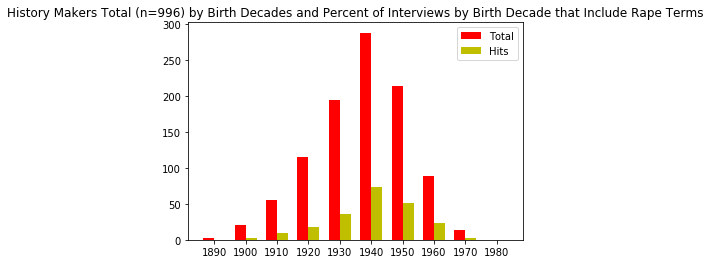

217


In [29]:
N = 10
total=[]
hits=[]
for i in range(1890, 1990, 10):
    total.append(dataformattedHM["\ufeffbirth_decade"][str(i)])
    hits.append(decadesinformation[str(i)]["HM"])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = pyplot.subplots()
rects1 = ax.bar(ind, total, width, color='r')
rects2 = ax.bar(ind + width, hits, width, color='y')

# add some text for labels, title and axes ticks
#ax.set_ylabel('Number')
ax.set_title('History Makers Total (n=996) by Birth Decades and Percent of Interviews by Birth Decade that Include Rape Terms')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980'))

ax.legend((rects1[0], rects2[0]), ('Total', 'Hits'))


pyplot.show()
print(sum(hits))

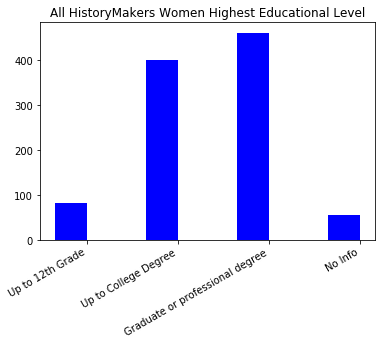

In [30]:
N = 4
total = (5+76+1, 304+95, 460, 55)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = pyplot.subplots()
rects1 = ax.bar(ind, total, width, color='b')

hits = (1+7+0,65+16,94,11)
#rects2 = ax.bar(ind + width, hits, width, color='y')

# add some text for labels, title and axes ticks
#ax.set_ylabel('Number')
ax.set_title('All HistoryMakers Women Highest Educational Level')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Up to 12th Grade', 'Up to College Degree', 'Graduate or professional degree', 'No Info'))

#ax.legend((rects1[0], rects2[0]), ('Total', 'Hits'))

pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')



pyplot.show()

History Makers Women Total (n=996) by Highest Achieved Education Level and Percent of Interviews by Education Level that Include Rape Terms

Left axis: number of interviews
X axis: educational level (up to high school graduate, up to college graduate, further schooling, no info)

Red: Number within female HM as a whole
Yellow: Only the interviews in the rape cluster

Percetages: What percentage of female HM in the given birth decade are in the rape cluster

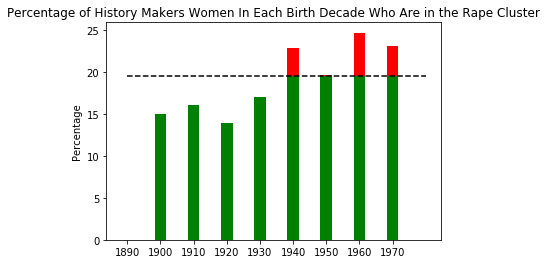

In [31]:
N = 9

ind = np.arange(N) 

# some example data
threshold = 19.5
values = np.array([0, 15, 16.1, 13.9, 17.0, 22.9, 19.6, 24.7, 23.1])
x = range(len(values))

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = pyplot.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)
ax.set_xticks(ind)
ax.set_xticklabels(('1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970'))
ax.set_title('Percentage of History Makers Women In Each Birth Decade Who Are in the Rape Cluster')
ax.set_ylabel('Percentage')


# horizontal line indicating the threshold
ax.plot([0., 9], [threshold, threshold], "k--")



fig.savefig("look-ma_a-threshold-plot.png")

Percentage of History Makers Women In Each Birth Decade Who Are in the Rape Cluster
Left axis: Percent of HM interviews in a given birthdecade who are in the rape cluster (ie, a 20 in 1950 means 20% of female HM born in the 1950s are in the rape cluster)
X axis: birth cohorts

Horizontal line: % of female HM interviews in the rape cluster as a whole

Red: portion above average (mostly for contrast)
green: portion up to average

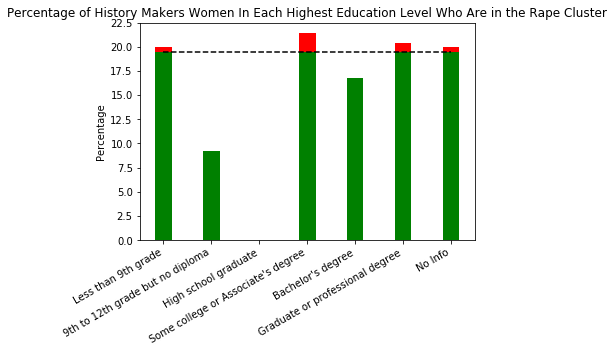

In [32]:
N = 7

ind = np.arange(N) 

# some example data
threshold = 19.5
values = np.array([20, 9.2, 0, 21.4, 16.8, 20.4, 20])
x = range(len(values))

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = pyplot.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)
ax.set_xticks(ind)
ax.set_xticklabels(('Less than 9th grade', '9th to 12th grade but no diploma', 'High school graduate', 'Some college or Associate\'s degree', 'Bachelor\'s degree', 'Graduate or professional degree', 'No Info'))
ax.set_title('Percentage of History Makers Women In Each Highest Education Level Who Are in the Rape Cluster')
ax.set_ylabel('Percentage')


# horizontal line indicating the threshold
ax.plot([0., 6], [threshold, threshold], "k--")
pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')



fig.savefig("look-ma_a-threshold-plot.png")

Percentage of History Makers Women In Each Educational status Who Are in the Rape Cluster
Left axis: Percent of HM interviews in a given education group who are in the rape cluster (ie, a 20 in kless than 9th grade means 20% of female HM born with less than a 9th grade education are in the rape cluster)
X axis: educational leve;s

Horizontal line: % of female HM interviews in the rape cluster as a whole

Red: portion above average (mostly for contrast)
green: portion up to average

(Not up to date with three category system, but I think this has been ruled a bad presentation format and so is not worth updating)

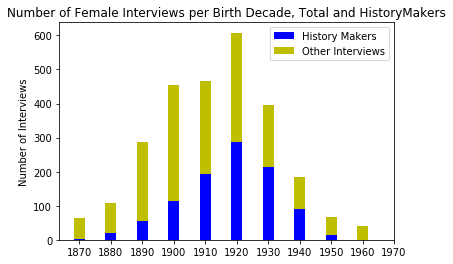

In [33]:
N = 11

ind = np.arange(N) 

values=[]
totals=[]

# some example data
threshold = 19.5
for i in range(1890, 1990, 10):
    totals.append(dataformatted["\ufeffbirth_decade"][str(i)])
    values.append(dataformattedHM["\ufeffbirth_decade"][str(i)])
x = range(len(values))

totals=np.array(totals)
values=np.array(values)

# split it up
above_threshold = totals - values
below_threshold = values

# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(x, below_threshold, 0.35, color="b")
other=ax.bar(x, above_threshold, 0.35, color="y",
        bottom=below_threshold)
ax.set_xticks(ind)
ax.set_xticklabels(('1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970'))
ax.set_title('Number of Female Interviews per Birth Decade, Total and HistoryMakers')
ax.set_ylabel('Number of Interviews')
ax.legend((hm, other), ('History Makers', 'Other Interviews'))



Number of Female Interviews per Birth Decade, Total and HistoryMakers

Left axis: number of interviews
X axis: birth decade

blue: only HM
Yellow: all non-HM interviews

[ 0  0  0  3  9 18 36 73 51 24  3]
[  0   2  14  18  24  56  65 151  90  38  13]


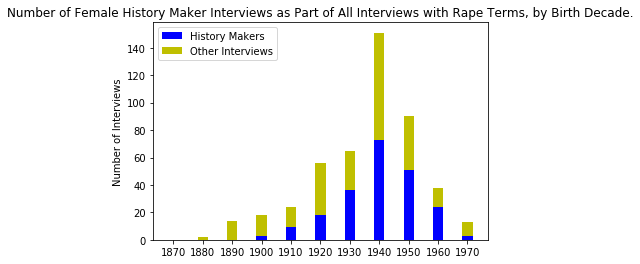

In [34]:
N = 11

ind = np.arange(N) 
values=[]
totals=[]

# some example data
for i in range(1870, 1980, 10):
    values.append(decadesinformation[str(i)]["HM"])
    totals.append(decadesinformation[str(i)]["total"])
    
values = np.array(values)
totals= np.array(totals)
print(values)
print(totals)

x = range(len(values))

# split it up
above_threshold = totals - values
below_threshold = values

# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(x, below_threshold, 0.35, color="b")
other=ax.bar(x, above_threshold, 0.35, color="y",
        bottom=below_threshold)
ax.set_xticks(ind)
ax.set_xticklabels(('1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970'))
ax.set_title('Number of Female History Maker Interviews as Part of All Interviews with Rape Terms, by Birth Decade.')
ax.set_ylabel('Number of Interviews')
ax.legend((hm, other), ('History Makers', 'Other Interviews'))


# horizontal line indicating the threshold
#ax.plot([0., 9], [threshold, threshold], "k--")



fig.savefig("look-ma_a-threshold-plot.png")

Number of Female History Maker Interviews as Part of All Interviews with Rape Terms, by Birth Decade

Left axis: number of interviews
X axis: birth decade

blue: only HM interviews in rape cluster
Yellow: all non-HM interviews in rape cluster

[ 0  0  0  3  9 18 36 73 51 24  3]
[  1   2  14  18  24  56  65 151  90  38  13]


Text(0, 0.5, 'Percentage of Interviews in Rape Cluster')

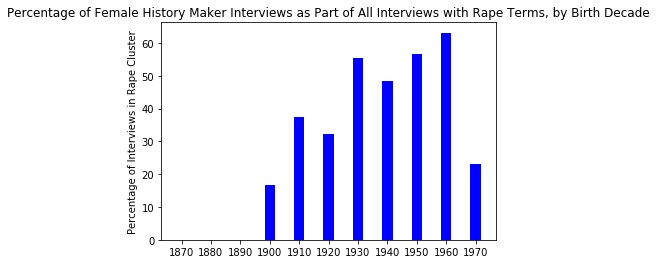

In [35]:
N = 11

ind = np.arange(N) 
values=[]
totals=[]

# some example data
for i in range(1870, 1980, 10):
    values.append(decadesinformation[str(i)]["HM"])
    totals.append(decadesinformation[str(i)]["total"])
    
    
#this is janky but its to avoid a divide by 0 issue- code crime but there are a lot of those in here
totals = [1 if x==0 else x for x in totals]
values = np.array(values)
totals= np.array(totals)


print(values)
print(totals)

x = range(len(values))

# split it up
below_threshold = values/totals*100


# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(x, below_threshold, 0.35, color="b")
ax.set_xticks(ind)
ax.set_xticklabels(('1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970'))
ax.set_title('Percentage of Female History Maker Interviews as Part of All Interviews with Rape Terms, by Birth Decade')
ax.set_ylabel('Percentage of Interviews in Rape Cluster')

Percentage of Female History Maker Interviews as Part of All Interviews with Rape Terms, by Birth Decade
Takes all the interviews in HM in rape cluster in a given birthcohort divided by the total number of interviews in the rape cluster in that birth cohort


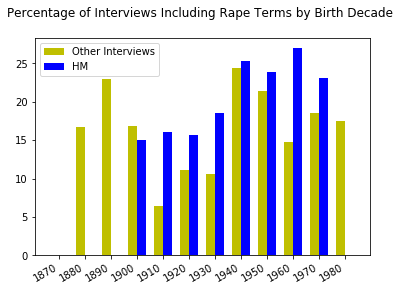

In [36]:
N = 12

HMhits=[]
hits=[]
total=[]
HMtotal=[]

for i in range(1870, 1990, 10):
    HMhits.append(decadesinformation[str(i)]["HM"])
    hits.append(decadesinformation[str(i)]["total"])
    total.append(dataformatted["\ufeffbirth_decade"][str(i)])
    HMtotal.append(dataformattedHM["\ufeffbirth_decade"][str(i)])

    
#total = (2, 13, 64, 108, 288, 450, 453, 594, 387, 176, 64, 39)
#1s are 0s
#HMtotal= [1,1,3,20,56,115,194,288,214,89,13,1]

total = [1 if x==0 else x for x in total]
HMtotal = [1 if x==0 else x for x in HMtotal]



first1=np.array(hits)
first2=np.array(total)

second1=np.array(HMhits)
second2=np.array(HMtotal)
second=second1/second2*100
first1=first1-second1
first2=first2-second2
first=first1/first2*100


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = pyplot.subplots()
rects1 = ax.bar(ind, first, width, color='y')

hits = (0, 3, 9, 16, 33, 66, 42, 22, 3)
rects2 = ax.bar(ind + width, second, width, color='b')

# add some text for labels, title and axes ticks
#ax.set_ylabel('Number')
ax.set_title('Percentage of Interviews Including Rape Terms by Birth Decade \n')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1870', '1880','1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980'))
pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.legend((rects1[0], rects2[0]), ('Other Interviews', 'HM'))

pyplot.show()